Importing the Dependencies

In [622]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

Data Collection and Processing

In [623]:
# Loading the Dataset to Pandas DataFrame
loan = pd.read_csv('/content/loan.csv')

loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [624]:
# Inspecting the shape of DataFrame
loan.shape

(614, 13)

In [625]:
# Statistical measures
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [626]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data Cleaning

In [627]:
# Dropping the Loan_ID columns
loan = loan.drop('Loan_ID', axis=1)

In [628]:
# Number of missing values in each column
loan.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [629]:
# Dropping the missing data who we cannot assume
loan.dropna(subset=['Gender', 'Married', 'LoanAmount'], inplace = True)

In [630]:
# Refining the "Dependents" column by filling in the missing data and converting it to integer values
loan['Dependents'] = loan['Dependents'].replace('3+', '4')
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].median())
loan['Dependents'] = loan['Dependents'].astype('int')

In [631]:
# Filling the missing data
loan["Self_Employed"].fillna("No", inplace=True)
loan['Credit_History'].fillna(0, inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median(), inplace=True)

In [632]:
# Number of missing data in each columns after data cleaning
loan.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [633]:
# Inspecting the shape of the DataFrame after data cleaning
loan.shape

(577, 12)

In [634]:
loan.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.819757,5297.119584,1651.006794,144.968804,342.322357,0.774697
std,1.199866,5853.236196,2994.669928,82.704182,64.880339,0.418144
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2889.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3800.000000,1229.000000,127.000000,360.000000,1.000000
75%,1.000000,5746.000000,2333.000000,167.000000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [635]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    object 
 1   Married            577 non-null    object 
 2   Dependents         577 non-null    int64  
 3   Education          577 non-null    object 
 4   Self_Employed      577 non-null    object 
 5   ApplicantIncome    577 non-null    int64  
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    object 
 11  Loan_Status        577 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 58.6+ KB


Data Manipulation

In [636]:
# Creating new binary columns for "Property_Area" column
loan['Rural'] = (loan['Property_Area'] == 'Rural').astype('int')
loan['Urban'] = (loan['Property_Area'] == 'Urban').astype('int')
loan['Semiurban'] = (loan['Property_Area'] == 'Semiurban').astype('int')

# Dropping "Property_Area" column
loan.drop('Property_Area', axis=1, inplace=True)

In [637]:
# Mapping categorical variables to binary values
loan['Gender'] = loan['Gender'].map({'Male': 1, 'Female': 2}).astype('int')
loan['Married'] = loan['Married'].map({'Yes': 1, 'No': 0}).astype('int')
loan['Education'] = loan['Education'].map({'Graduate': 1, 'Not Graduate': 0}).astype('int')
loan['Self_Employed'] = loan['Self_Employed'].map({'Yes': 1, 'No': 0}).astype('int')
loan['Loan_Status'] = loan['Loan_Status'].map({'Y': 1, 'N': 0}).astype('int')

In [638]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    int64  
 1   Married            577 non-null    int64  
 2   Dependents         577 non-null    int64  
 3   Education          577 non-null    int64  
 4   Self_Employed      577 non-null    int64  
 5   ApplicantIncome    577 non-null    int64  
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Loan_Status        577 non-null    int64  
 11  Rural              577 non-null    int64  
 12  Urban              577 non-null    int64  
 13  Semiurban          577 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 67.6 KB


In [639]:
# Inspecting the shape of the DataFrame after data manipulating
loan.shape

(577, 14)

In [640]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Urban,Semiurban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1,0
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0


Data Visualization

<ipython-input-641-0a2a9cb49cce>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(loan.corr(), dtype=np.bool))


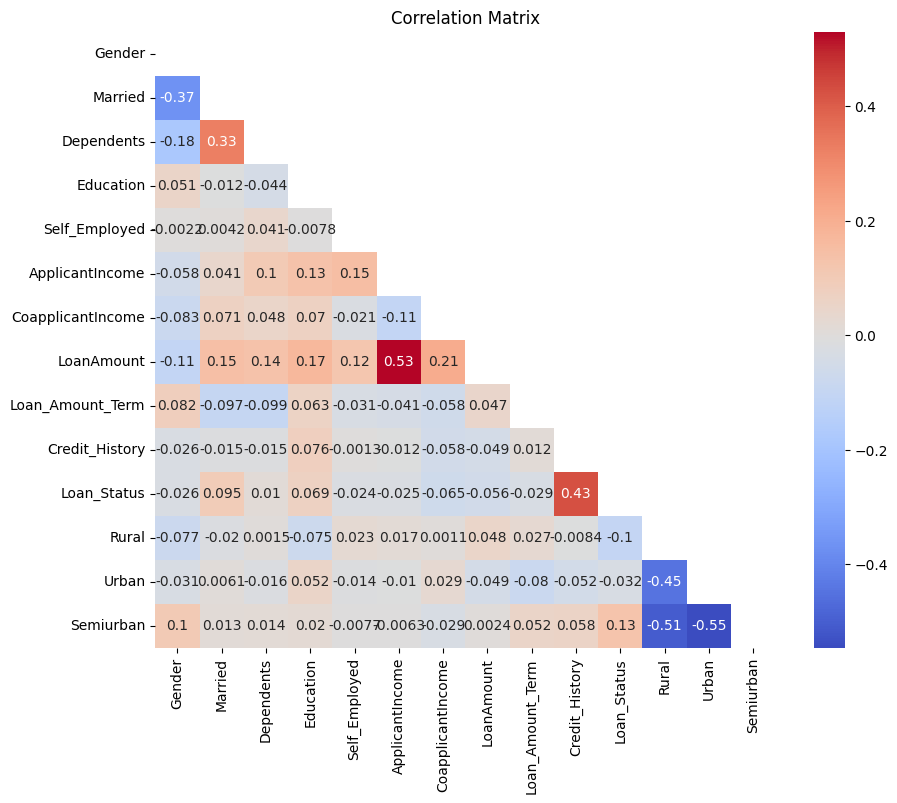

In [641]:
# Plotting the correlation map of the DataFrame
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(loan.corr(), dtype=np.bool))
sns.heatmap(loan.corr(), mask = mask, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We notice kind of strong correlation between "Credit_History" column and our label "Loan_Status"

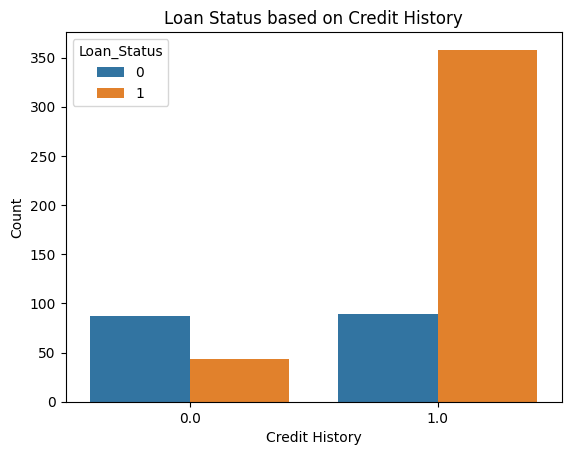

In [642]:
# Plotting a count plot between the 'Credit_History' column and the 'Loan_Status' label
sns.countplot(x = 'Credit_History', hue='Loan_Status', data=loan)
plt.title('Loan Status based on Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

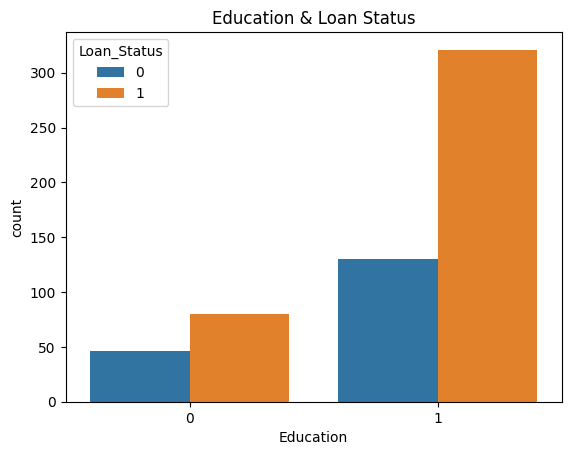

In [643]:
# Plotting a count plot between the 'Education' column and the 'Loan_Status' label
sns.countplot(x='Education', hue='Loan_Status', data=loan)
plt.title('Education & Loan Status')
plt.show()

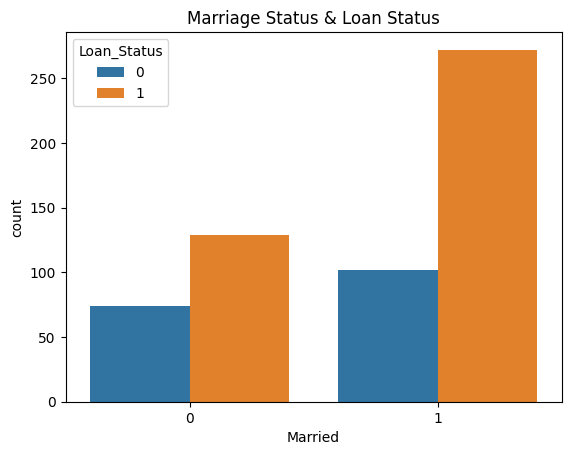

In [644]:
# Plotting a count plot between the 'Married' column and the 'Load_Status' label
sns.countplot(x='Married', hue='Loan_Status', data = loan)
plt.title('Marriage Status & Loan Status')
plt.show()

Machine Learning

In [645]:
# Separating the data and label
X = loan.drop('Loan_Status', axis=1)
y = loan['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=13)


In [646]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [647]:
# Loading the models
lr = LogisticRegression()
svc = SVC()
xgb = XGBClassifier(max_depth=3, min_child_weight=1, gamma=0.1)
knn = KNeighborsClassifier()

# Storing the models in a list
models = [lr, svc, knn, xgb]
model_names = ['Logistic Regression', 'SVC', 'KNeighbors Classifier', 'XGBoost Classifier']

In [648]:
# Evaluating the models with non scaled data
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    print('The accuracy score of {} on the training data is: {:.2f}'.format(model_name, accuracy_score(y_train, pred_train)))

    pred_test = model.predict(X_test)
    print('The accuracy score of {} on the test data is: {:.2f} \n'.format(model_name, accuracy_score(y_test, pred_test)))

The accuracy score of Logistic Regression on the training data is: 0.76
The accuracy score of Logistic Regression on the test data is: 0.76 

The accuracy score of SVC on the training data is: 0.69
The accuracy score of SVC on the test data is: 0.70 

The accuracy score of KNeighbors Classifier on the training data is: 0.74
The accuracy score of KNeighbors Classifier on the test data is: 0.62 

The accuracy score of XGBoost Classifier on the training data is: 0.96
The accuracy score of XGBoost Classifier on the test data is: 0.71 



In [649]:
# Evaluating the model with scaled data
for model, model_name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    pred_train = model.predict(X_train_scaled)
    print('The accuracy score of {} on the training data is: {:.2f}'.format(model_name, accuracy_score(y_train, pred_train)))

    pred_test = model.predict(X_test_scaled)
    print('The accuracy score of {} on the test data is: {:.2f}\n'.format(model_name, accuracy_score(y_test, pred_test)))

The accuracy score of Logistic Regression on the training data is: 0.76
The accuracy score of Logistic Regression on the test data is: 0.78

The accuracy score of SVC on the training data is: 0.79
The accuracy score of SVC on the test data is: 0.79

The accuracy score of KNeighbors Classifier on the training data is: 0.79
The accuracy score of KNeighbors Classifier on the test data is: 0.76

The accuracy score of XGBoost Classifier on the training data is: 0.96
The accuracy score of XGBoost Classifier on the test data is: 0.71



Upon observation, we found that scaling the data leads to improved accuracy scores for both the training and test datasets. However, it is worth noting that the XGBoost Classifier does not exhibit the same improvement when applied to scaled data.

We have observed that the SVC model performs the best when the data is scaled, while the XGBoost model exhibits poor performance due to overfitting on the training data.